# Part II - Loan Dataset Presentation
## by (Olusegun Emmanuel Ajibola ) olusegunajibola.e@gmail.com

## Investigation Overview


In this presentation we visualize and summarise the different behaviours or attributes  between customers who paid back their loan and customers who did not.


## Dataset Overview

This document explores a dataset containing outcomes and attributes for approximately 18,000 loan application. Our objective is to understand and summarise the different behaviours or attributes between customers who paid back their loan and customers who did not using the historical data available. The data was gotten from Lloyd's Bank Big Data Challenge. Before cleaning, we had a dataset which comprised of 18324 records and 31 features. After data cleaning, we arrived at a 15863 by 28 dataframe.

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:

from google.colab import drive
drive.mount('/content/drive')

import os
# change directory
os.chdir('/content/drive/MyDrive/Colab Files/Udacity/Udacity - Data Analyst/projects/03_Flights_n_Loans/lloyds-bigdata-loan-customers')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'01 guides_n_instructions'  'A Data Strategy'   loan_data_cleaned_v2.0.csv
'02 data_n_dictionary'	     LICENSE	        README.md


In [17]:
# load in the dataset into a pandas dataframe
loan_data_clean = pd.read_csv('loan_data_cleaned_v2.0.csv')
loan = loan_data_clean.copy()

In [18]:
# convert emp_length, and term into ordered categorical types
ordinal_var_dict = {'emp_length': ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                    'term': ['36 months', '60 months']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

## Relationship between loan status and state address. Away from the univariate plot for the state address, this time we look at the outcome for the top 30 states.

From the above plot, we witness that states with high amount of loan applications also witnessed a high amount of loan Fully Paid and Charged off loans as well. Notable states include : CA, TX, NY, FL, VA, PA and IL. Furthermore, there are no states where the number of customers who were Charged Off were more than those that were Fully Paid.

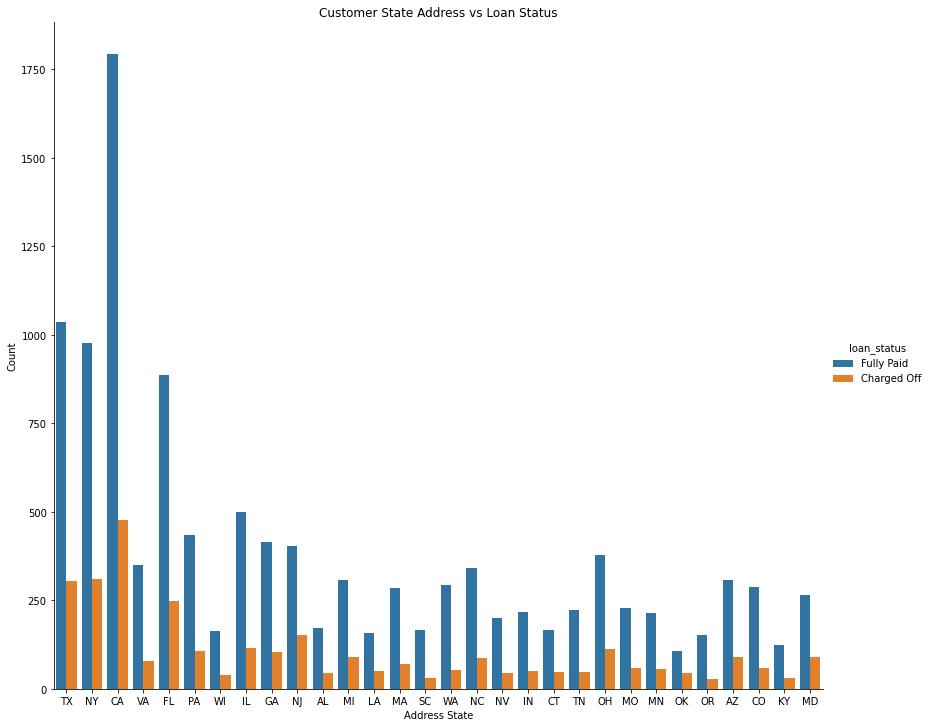

In [19]:
sort = loan.groupby(['addr_state'])['loan_status'].count().sort_values(ascending = False).index[:30] # pick top 30 states
loan_top_30_states = loan[loan['addr_state'].isin(sort)]
loan_top_30_states['addr_state'] = loan_top_30_states['addr_state'].astype('object')
sb.catplot(data = loan_top_30_states, x="addr_state", hue="loan_status", kind = 'count', height=10, aspect=11.7/10);
plt.xlabel('Address State')
plt.ylabel('Count')
plt.title('Customer State Address vs Loan Status') ;

## Relationship between loan status and employment length.

Most customers with 10+ years of employment did well in paying their loans. Although they equally have more individuals who were charged off.

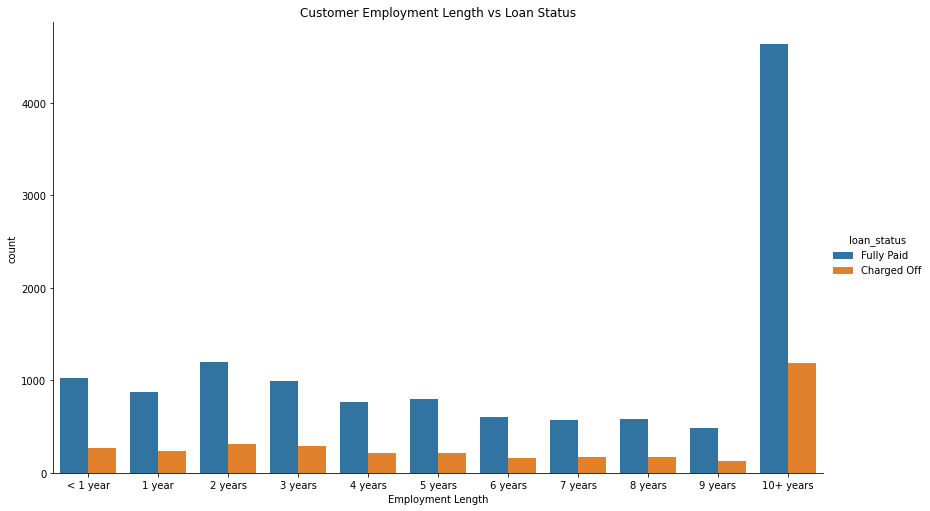

In [20]:
ax = sb.catplot(data = loan, x="emp_length", hue="loan_status", kind = 'count', height=7, aspect=11.7/7);
plt.xlabel('Employment Length')
plt.title('Customer Employment Length vs Loan Status') ;

## Relationship between loan status and the interest rate on the loan and employment length.

We noticed that the interest rate distribution seems to be almost the same accross all employment length category. Again, the rate seems lower for those who paid back. We investigate this using the boxplot which shows us that those who paid back the loans did so probably because of favourable interest rate.

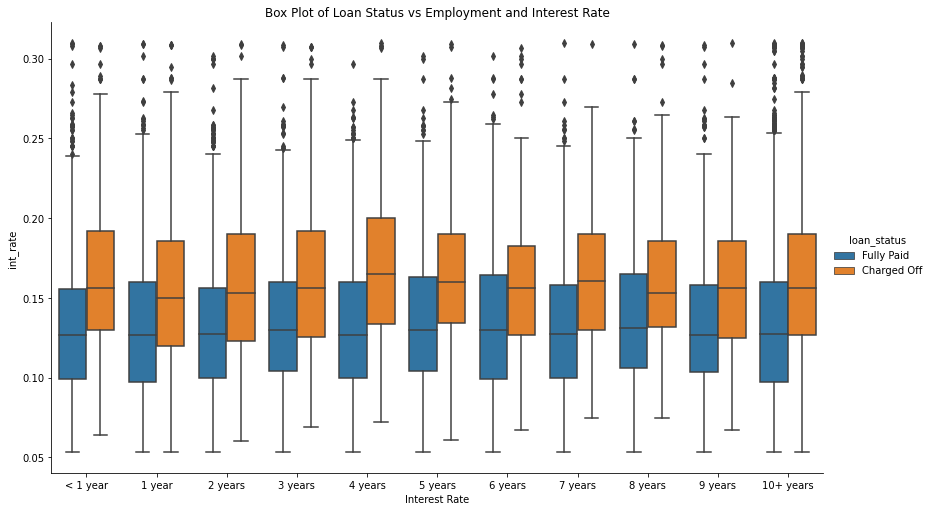

In [21]:
sb.catplot(data=loan, x="emp_length", y="int_rate", hue="loan_status", kind="box", height=7, aspect=11.7/7)
plt.xlabel('Employment Length')
plt.xlabel('Interest Rate')
plt.title('Box Plot of Loan Status vs Employment and Interest Rate');

## Relationship between loan status, tenor and annual income.

Again, we see from the dodged point plot that across the loan tenors, those who earned higher on average were able to pay back the loans.

The distribution showed in the box plot showed that those who paid back the loans did so probably because of favourable interest rate.

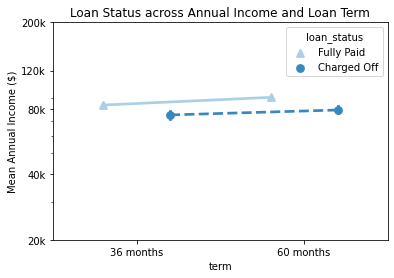

In [22]:
ax = sb.pointplot(data = loan, x = 'term', y = 'annual_inc', hue = 'loan_status',
           palette = 'Blues', linestyles = ['-','--'], dodge = 0.4,
    markers=["^", "o"])
plt.title('Loan Status across Annual Income and Loan Term')
plt.ylabel('Mean Annual Income ($)')
plt.yscale('log')
plt.yticks([2e4, 4e4, 8e4, 12e4, 20e4], ['20k', '40k', '80k', '120k',  '200k'])
ax.set_yticklabels([],minor = True)
plt.show();

In [24]:
# !jupyter nbconvert Part_II_slide_deck_data_strategy_loans.ipynb --to slides --post serve --no-input --no-prompt